##**PROYECTO FINAL DSA**


#Librerias

In [ ]:
import pandas as pd
from IPython.display import display
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Exploracion de los datos

##Carga de Datos

Se cambian los nombres de las dimensiones para simplificar su entendimiento
- Ship ID - Ship Classification == Vessel type
- Ship - Name == Ship Name



In [ ]:
url = 'https://github.com/anfisbena/MIAD-DSA/raw/refs/heads/main/data/RTOP.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

df=df.rename(columns={'Ship ID - Ship Classification':'Vessel Type','Ship - Name':'Ship Name'})

In [ ]:
df.head()

,RTOP,Project #,Combo,Status,Ship Name,Vessel Type,Responsible,Region Name,Country,Location,Business Unit,Awarded Company,Arrival,Departure,Deadline(mmddyyyy),Time to Execute
0,42099,NaN,NaN,New Bid,Howard,DDG,Michelle Tejada <63050378.c92m>;Wafun Leung <6...,INDOPACOM,Japan,Yokosuka,Husbanding,NaN,10/21/2024,10/25/2024,10/17/2024,4 days / 96 hours
1,42085,NaN,NaN,New Bid,Rushmore,LSD,Michelle Tejada <63050378.c92m>;Wafun Leung <6...,INDOPACOM,Japan,Sasebo,Husbanding,NaN,10/26/2024,10/27/2024,10/21/2024,2 days / 24 hours
2,Z13947-25-FUJ-0002,NaN,NaN,New Bid,Clarence Sutphin,WPC,Daniel Areiza <63306669.c4ik>;Miguel Uribe <63...,CENTCOM,United Arab Emirates,Fujairah,Husbanding,NaN,10/20/2024,10/20/2024,10/17/2024,1 days / 0 hours
3,42097,NaN,NaN,Not Submitted,Savannah,LCS,Alexander Trowe <66235880.8a7d>;Michelle Tejad...,INDOPACOM,Malaysia,Sepangar,Husbanding,NaN,10/20/2024,10/22/2024,10/17/2024,2 days / 49 hours
4,42065,NaN,NaN,New Bid,Millinocket,T-EPF,Benjamin McFarland <63420507.cyrr>;Kimber Trac...,NORTHCOM,USA,Everett,Husbanding,NaN,10/24/2024,11/7/2024,10/21/2024,14 days / 336 hours


##Evaluacion de datos



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   RTOP                8847 non-null   object
 1   Project #           753 non-null    object
 2   Combo               1626 non-null   object
 3   Status              8847 non-null   object
 4   Ship Name           8597 non-null   object
 5   Vessel Type         8201 non-null   object
 6   Responsible         8845 non-null   object
 7   Region Name         8847 non-null   object
 8   Country             8847 non-null   object
 9   Location            8847 non-null   object
 10  Business Unit       8847 non-null   object
 11  Awarded Company     6618 non-null   object
 12  Arrival             8833 non-null   object
 13  Departure           8832 non-null   object
 14  Deadline(mmddyyyy)  8838 non-null   object
 15  Time to Execute     8847 non-null   object
dtypes: object(16)
memory usa

In [ ]:
df.isnull().sum()

,0
RTOP,0
Project #,8094
Combo,7221
Status,0
Ship Name,250
Vessel Type,646
Responsible,2
Region Name,0
Country,0
Location,0


<Axes: >

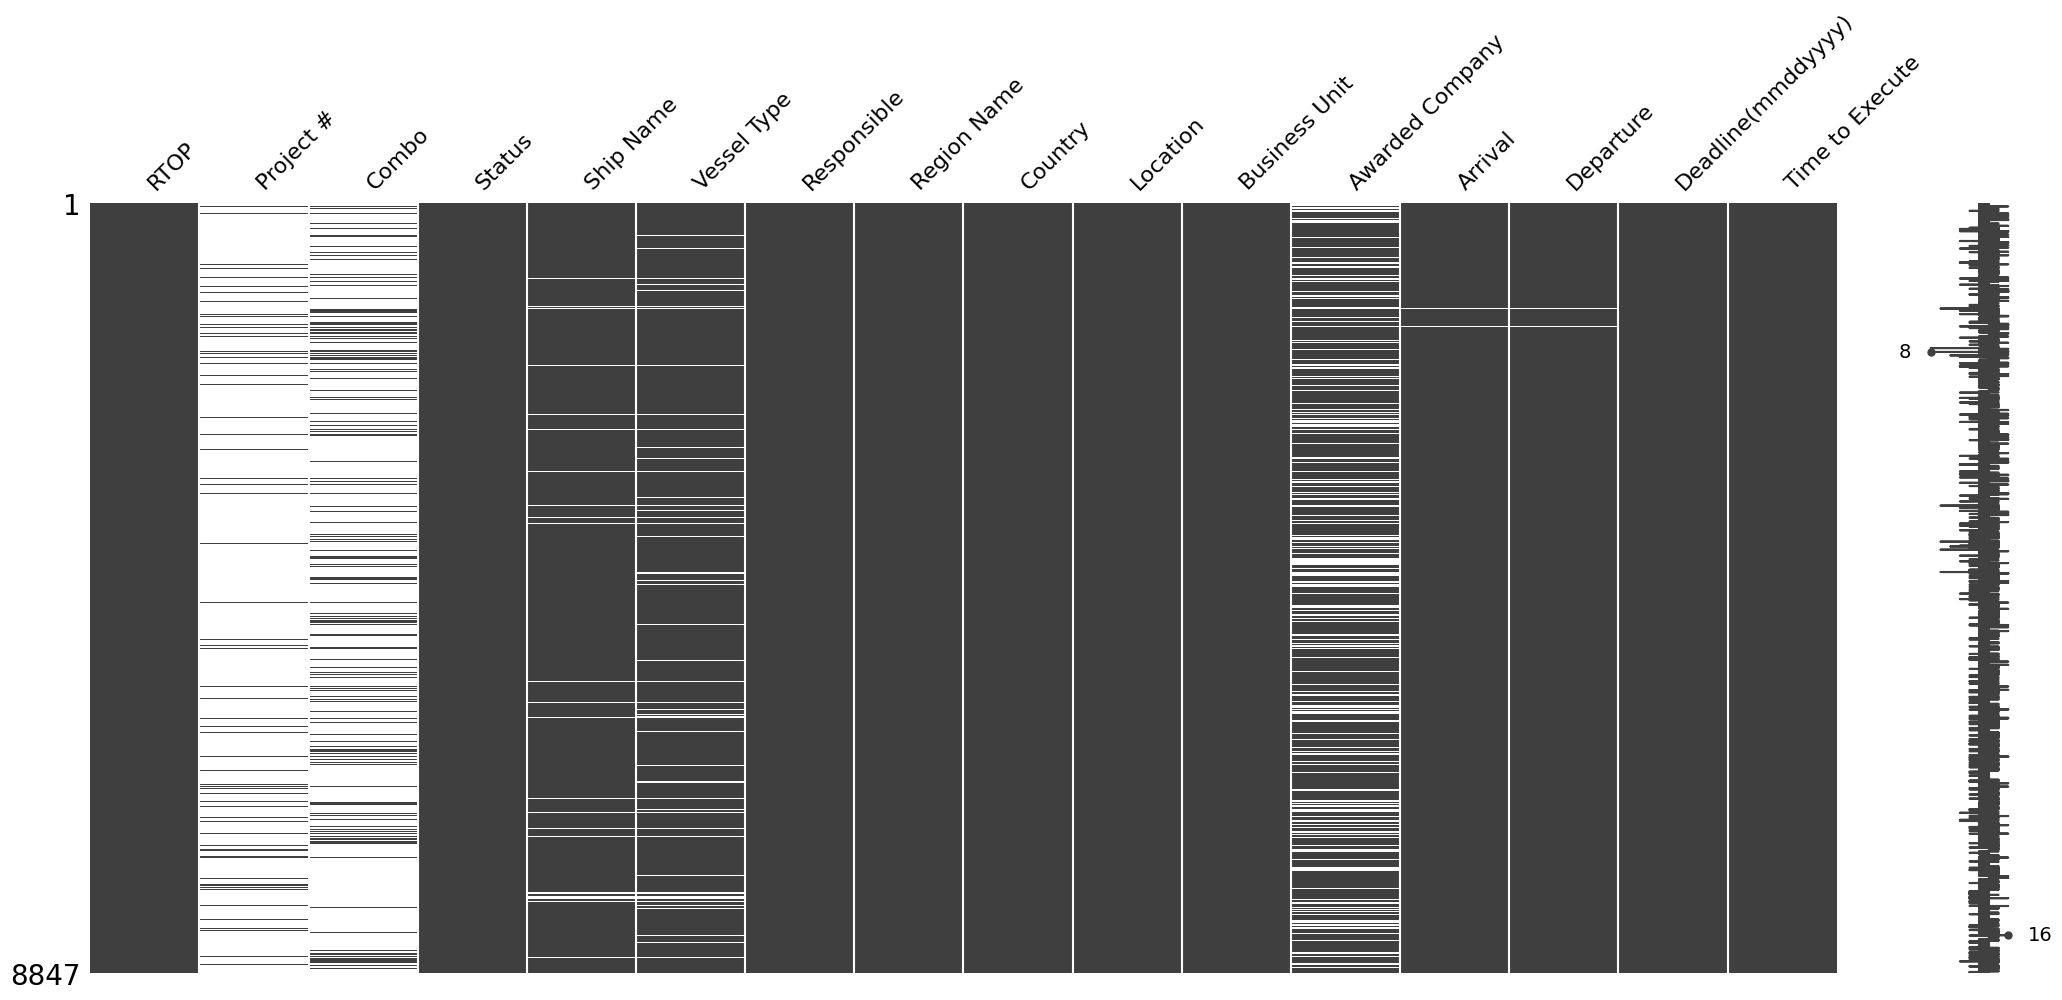

In [ ]:
msno.matrix(df)

##Limpieza de datos

Ajustandose al alcance del proyecto, se reduce la dimensionalidad del dataset a sus valores primordiales para el caso, por ende se van a conservar:
- Ship Name
- Vessel type
- Region Name
- Country
- Location
- Arrival
- Departure
- Time to Execute

**Información a considerar**
+ Aquellas muestras que contengan valores nulos de Arrival, Departure, Ship Name y location inicialmente serán limpiados del modelo

+ Los Champions del proyecto tambien informan que ofertas con dias en ejecución menores a 0 y mayores a 60 serán desechadas debido a un posible error humano

+ Toda las ofertas cuyo Status sea Cancelled, no serán tomadas en cuenta

Debido a esto se limpiaron 2135 ofertas que representan 24% de los datos

In [ ]:
df_clean=df[['Ship Name','Vessel Type','Country','Location','Arrival','Departure','Region Name','Status']]
df_clean = df_clean.dropna(subset=['Arrival','Departure','Ship Name','Location','Vessel Type','Status'])
df_clean = df_clean[df_clean['Status'] != 'Cancelled']
# Convertir las columnas 'Arrival' y 'Departure' a datetime
df_clean['Arrival'] = pd.to_datetime(df_clean['Arrival'], errors='coerce')
df_clean['Departure'] = pd.to_datetime(df_clean['Departure'], errors='coerce')
df_clean['Duration'] = (df_clean['Departure'] - df_clean['Arrival']).dt.days
# Filtrar las filas donde 'Duration' sea menor o igual a 60 días
df_clean = df_clean[(df_clean['Duration'] <= 60) & (df_clean['Duration'] >= 0)]

<Axes: >

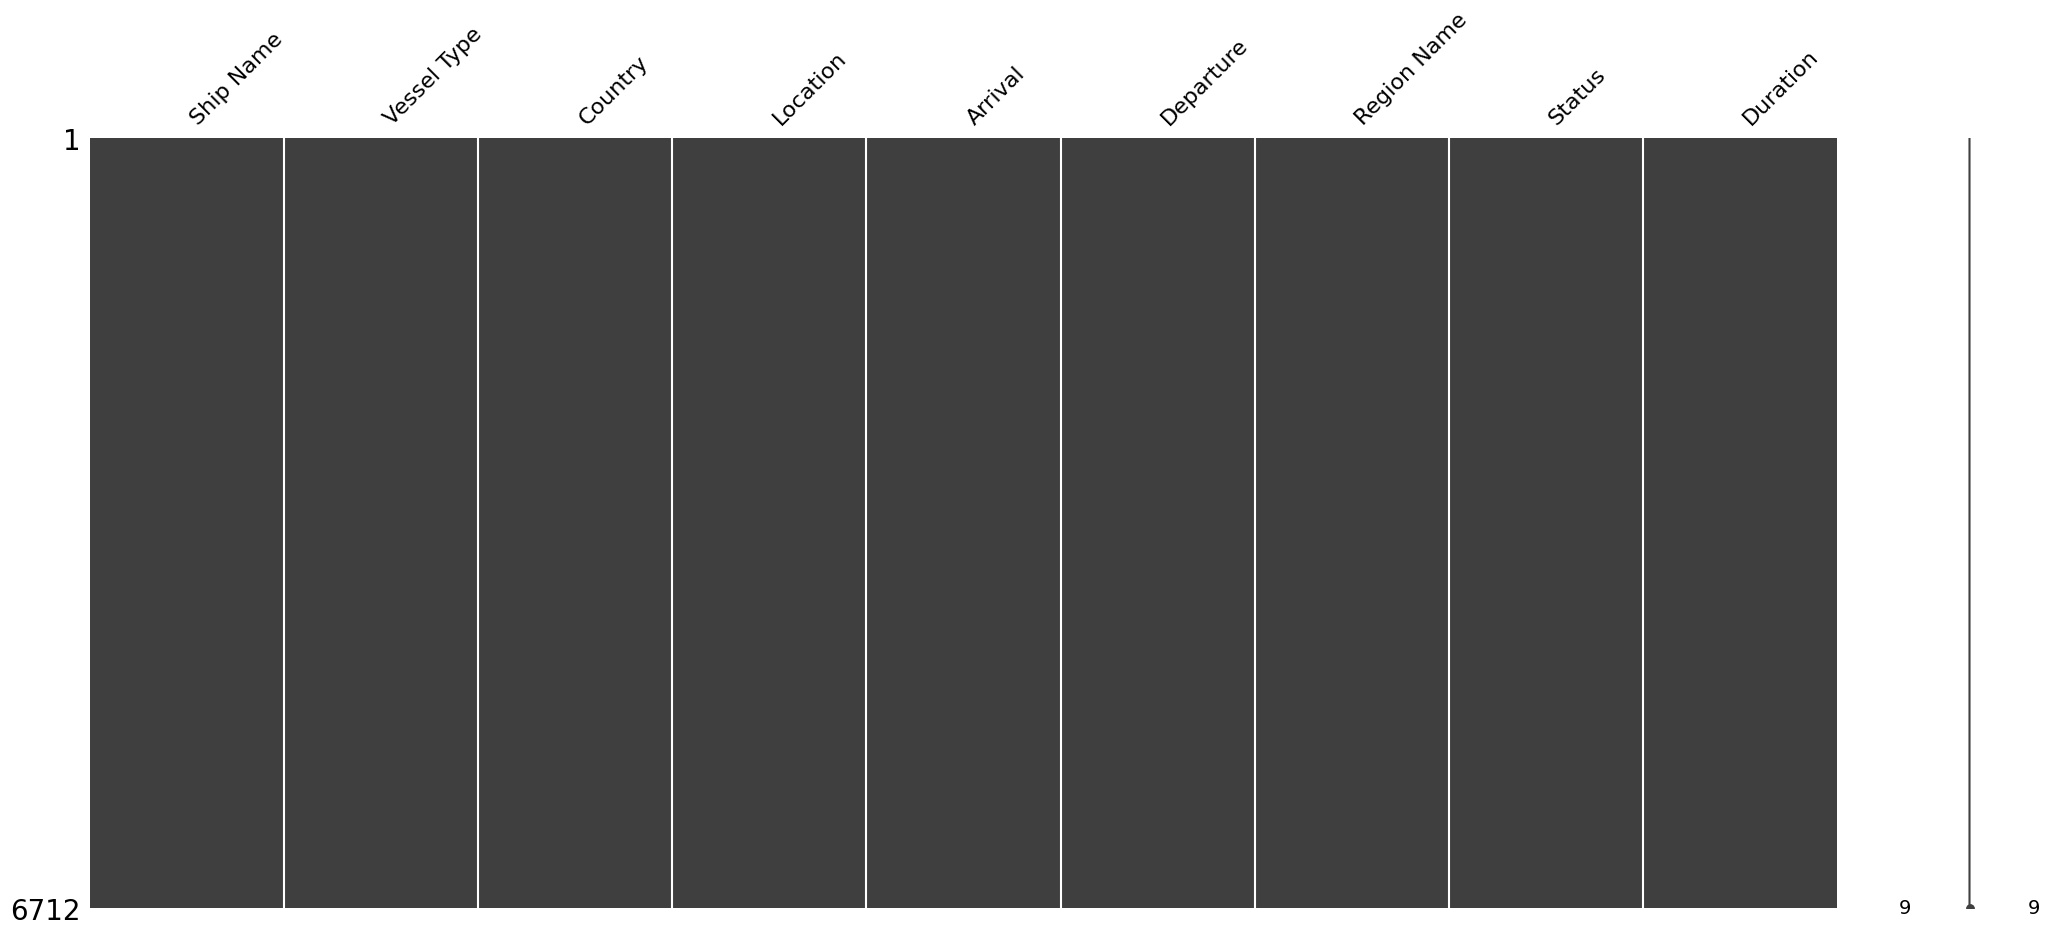

In [ ]:
msno.matrix(df_clean)

In [ ]:
stats = df_clean.describe(include='all')
display(stats)

,Ship Name,Vessel Type,Country,Location,Arrival,Departure,Region Name,Status,Duration
count,6712,6712,6712,6712,6712,6712,6712,6712,6712.000000
unique,410,48,139,523,NaN,NaN,6,8,NaN
top,DDG,DDG,Japan,Fujairah,NaN,NaN,INDOPACOM,Not Submitted,NaN
freq,143,1117,755,423,NaN,NaN,2084,4638,NaN
mean,NaN,NaN,NaN,NaN,2023-02-16 18:48:54.922526976,2023-02-21 01:09:43.551847168,NaN,NaN,4.264452
min,NaN,NaN,NaN,NaN,2020-02-15 00:00:00,2020-02-18 00:00:00,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,2022-05-21 00:00:00,2022-05-25 00:00:00,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,2023-03-03 12:00:00,2023-03-09 00:00:00,NaN,NaN,3.000000
75%,NaN,NaN,NaN,NaN,2023-12-14 06:00:00,2023-12-19 00:00:00,NaN,NaN,4.000000
max,NaN,NaN,NaN,NaN,2024-11-11 00:00:00,2024-11-21 00:00:00,NaN,NaN,60.000000


Frecuencia de cada barco, país y región

##Distribución de los barcos

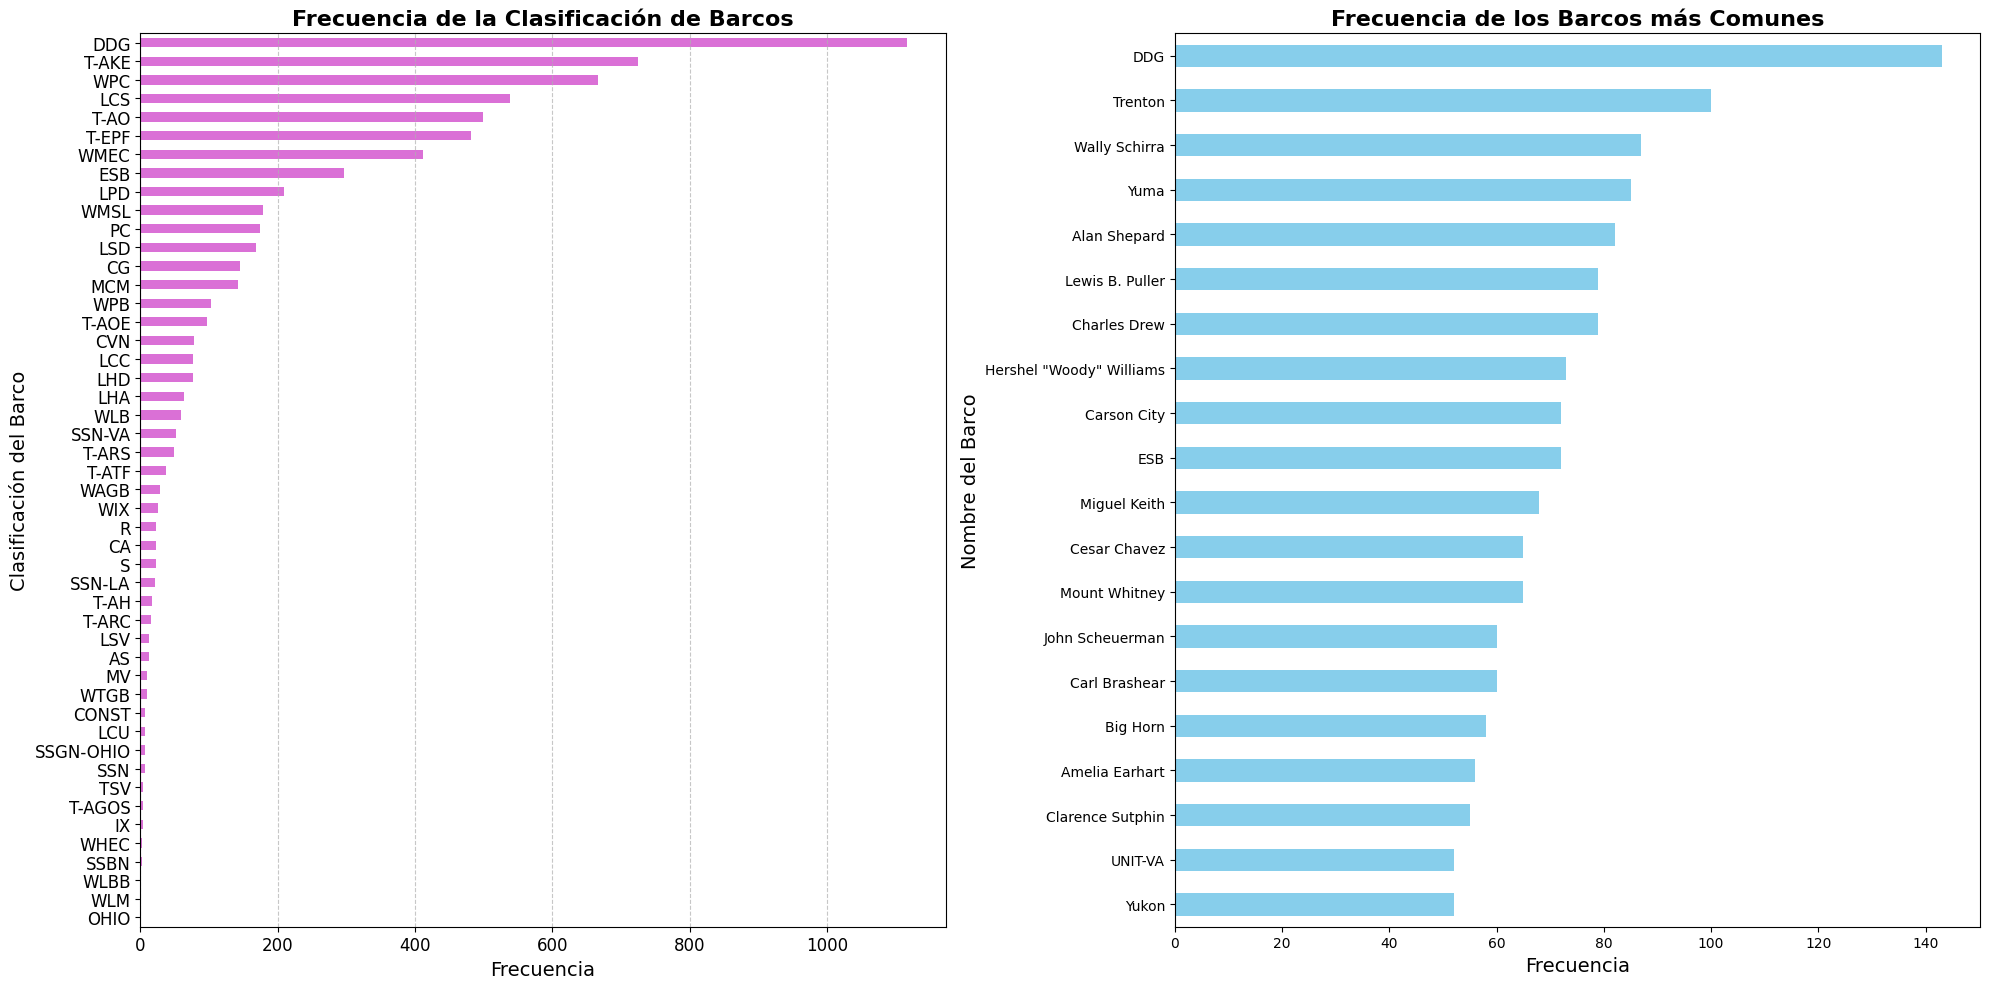

In [ ]:
def plot_ship_data(df):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    # Primera gráfica: Frecuencia de la Clasificación de Barcos
    ship_class_freq = df['Vessel Type'].value_counts()
    ship_class_freq.plot(kind='barh', color='orchid', ax=axs[0])
    axs[0].invert_yaxis()
    axs[0].set_title('Frecuencia de la Clasificación de Barcos', fontsize=16, fontweight='bold')
    axs[0].set_xlabel('Frecuencia', fontsize=14)
    axs[0].set_ylabel('Clasificación del Barco', fontsize=14)
    axs[0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[0].tick_params(axis='both', labelsize=12)

    # Segunda gráfica: Frecuencia de los Barcos más Comunes
    barco_freq = df['Ship Name'].value_counts().head(20)
    barco_freq.plot(kind='barh', color='skyblue', ax=axs[1])
    axs[1].invert_yaxis()
    axs[1].set_xlabel('Frecuencia', fontsize=14)
    axs[1].set_ylabel('Nombre del Barco', fontsize=14)
    axs[1].set_title('Frecuencia de los Barcos más Comunes', fontsize=16, fontweight='bold')

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

plot_ship_data(df_clean)

##Distribución de las ofertas de forma espacial

In [ ]:
country_coordinates={
    "Nigeria": [9.0820, 8.6753],
    "Rarotonga": [-21.2367, -159.7776],
    "Montserrat": [16.7425, -62.1874],
    "San Eustaquio": [17.4892, -62.9736],
    "Zimbabwe": [-19.0154, 29.1549],
    "Zambia": [-13.1339, 27.8493],
    "Yemen": [15.5527, 48.5164],
    "Western Samoa": [-13.7590, -172.1046],
    "Western Sahara": [24.2155, -12.8858],
    "Virgin Islands": [18.3358, -64.8963],
    "Hungary": [47.1625, 19.5033],
    "Uzbekistan": [41.3775, 64.5853],
    "Uruguay": [-32.5228, -55.7658],
    "United Republic of Tanzania": [-6.3690, 34.8888],
    "Ukraine": [48.3794, 31.1656],
    "Uganda": [1.3733, 32.2903],
    "Tuvalu": [-7.1095, 179.1940],
    "Turks and Caicos Islands": [21.6940, -71.7979],
    "Turkmenistan": [38.9697, 59.5563],
    "Trinidad and Tobago": [10.6918, -61.2225],
    "Tonga": [-21.1790, -175.1982],
    "Togo": [8.6195, 0.8248],
    "Thailand": [15.8700, 100.9925],
    "Tajikistan": [38.8610, 71.2761],
    "Taiwan": [23.6978, 120.9605],
    "Syria": [34.8021, 38.9968],
    "Switzerland": [46.8182, 8.2275],
    "Suriname": [3.9193, -56.0278],
    "Sudan": [12.8628, 30.2176],
    "St. Maarten": [18.0425, -63.0548],
    "Sri Lanka": [7.8731, 80.7718],
    "Southern Africa": [-31.2532, 24.6626],
    "South Sudan": [6.8770, 31.3070],
    "South Africa": [-30.5595, 22.9375],
    "Solomon Islands": [-9.6457, 160.1562],
    "Slovenia": [46.1512, 14.9955],
    "Slovakia": [48.6690, 19.6990],
    "Sierra Leone": [8.4606, -11.7799],
    "Seychelles": [-4.6796, 55.4918],
    "Serbia": [44.0165, 21.0059],
    "Saudi Arabia": [23.8859, 45.0792],
    "Sao Tome and Principe": [0.1864, 6.6131],
    "San Marino": [43.9424, 12.4578],
    "Samoa": [-13.7590, -172.1046],
    "Saint-Barheleme": [17.8962, -62.8318],
    "Saint Vincent and the Grenadines": [12.9843, -61.2872],
    "Saint Lucia": [13.9094, -60.9789],
    "Rwanda": [-1.9403, 29.8739],
    "Romania": [45.9432, 24.9668],
    "Reunion": [-21.1151, 55.5364],
    "Qatar": [25.3548, 51.1839],
    "Puerto Rico": [18.2208, -66.5901],
    "Paraguay": [-23.4425, -58.4438],
    "Palau": [7.5149, 134.5825],
    "Pakistan": [30.3753, 69.3451],
    "Niger": [17.6078, 8.0817],
    "Nicaragua": [12.8654, -85.2072],
    "New Zealand": [-40.9006, 174.8860],
    "New Caledonia": [-20.9043, 165.6180],
    "Netherlands": [52.1326, 5.2913],
    "Nepal": [28.3949, 84.1240],
    "Nauru": [-0.5228, 166.9315],
    "Namibia": [-22.9576, 18.4904],
    "Myanmar - Burma": [21.9162, 95.9559],
    "Mozambique": [-18.6657, 35.5296],
    "Mongolia": [46.8625, 103.8467],
    "Monaco": [43.7384, 7.4246],
    "Moldova": [47.4116, 28.3699],
    "Mayotte": [-12.8275, 45.1662],
    "Mauritius": [-20.3484, 57.5522],
    "Mauritania": [21.0079, -10.9408],
    "Marshall Islands": [7.1315, 171.1845],
    "Marianas Islands": [15.0979, 145.6739],
    "Malta": [35.9375, 14.3754],
    "Mali": [17.5707, -3.9962],
    "Maldives": [3.2028, 73.2207],
    "Malawi": [-13.2543, 34.3015],
    "Madagascar": [-18.7669, 46.8691],
    "Macedonia": [41.6086, 21.7453],
    "Luxembourg": [49.8153, 6.1296],
    "Lithuania": [55.1694, 23.8813],
    "Liechtenstein": [47.1660, 9.5554],
    "Libya": [26.3351, 17.2283],
    "Liberia": [6.4281, -9.4295],
    "Lesotho": [-29.6099, 28.2336],
    "Latvia": [56.8796, 24.6032],
    "Laos": [19.8563, 102.4955],
    "Kyrgyzstan": [41.2044, 74.7661],
    "Kuwait": [29.3759, 47.9774],
    "Kosovo": [42.6026, 20.9020],
    "Kiribati": [-3.3704, -168.7340],
    "Kazakhstan": [48.0196, 66.9237],
    "Iraq": [33.2232, 43.6793],
    "Iran": [32.4279, 53.6880],
    "Iceland": [64.9631, -19.0208],
    "Hong Kong": [22.3964, 114.1095],
    "Honduras": [15.2000, -86.2419],
    "Guinea": [9.9456, -9.6966],
    "Grenada": [12.1165, -61.6790],
    "Grand Cayman Islands": [19.3133, -81.2546],
    "Gibraltar": [36.1408, -5.3536],
    "Ghana": [7.9465, -1.0232],
    "Federated States of Micronesia": [7.4256, 150.5508],
    "Ethiopia": [9.1450, 40.4897],
    "Eswatini": [-26.5225, 31.4659],
    "Estonia": [58.5953, 25.0136],
    "Dominican Republic": [18.7357, -70.1627],
    "Dominica": [15.4150, -61.3710],
    "Democratic Republic of the Congo": [-4.0383, 21.7587],
    "Cyprus": [35.1264, 33.4299],
    "Curacao": [12.1696, -68.9900],
    "China": [35.8617, 104.1954],
    "Cabo Verde": [16.5388, -23.0418],
    "Bulgaria": [42.7339, 25.4858],
    "Belarus": [53.7098, 27.9534],
    "Armenia": [40.0691, 45.0382],
    "Albania": [41.1533, 20.1683],
    "Afghanistan": [33.9391, 67.7100],
    "Vietnam": [14.0583, 108.2772],
    "Venezuela": [6.4238, -66.5897],
    "USA": [37.0902, -95.7129],
    "United Kingdom": [55.3781, -3.4360],
    "United Arab Emirates": [23.4241, 53.8478],
    "Turkey": [38.9637, 35.2433],
    "Tunisia": [33.8869, 9.5375],
    "Timor-Leste": [-8.8742, 125.7275],
    "Sweden": [60.1282, 18.6435],
    "Spain": [40.4637, -3.7492],
    "South Korea": [35.9078, 127.7669],
    "Singapore": [1.3521, 103.8198],
    "Senegal": [14.4974, -14.4524],
    "Scotland": [56.4907, -4.2026],
    "Saint Kitts and Nevis": [17.3578, -62.782998],
    "Portugal": [39.3999, -8.2245],
    "Poland": [51.9194, 19.1451],
    "Philippines": [12.8797, 121.7740],
    "Peru": [-9.1900, -75.0152],
    "Papua New Guinea": [-6.314993, 143.95555],
    "Panama": [8.5380, -80.7821],
    "Oman": [21.4735, 55.9754],
    "Norway": [60.4720, 8.4689],
    "Netherlands Antilles": [12.226079, -69.060087],
    "Morocco": [31.7917, -7.0926],
    "Montenegro": [42.7087, 19.3744],
    "Mexico": [23.6345, -102.5528],
    "Martinique": [14.6415, -61.0242],
    "Malaysia": [4.2105, 101.9758],
    "Lebanon": [33.8547, 35.8623],
    "Kenya": [-1.2921, 36.8219],
    "Jordan": [30.5852, 36.2384],
    "Japan": [36.2048, 138.2529],
    "Jamaica": [18.1096, -77.2975],
    "Italy": [41.8719, 12.5674],
    "Israel": [31.0461, 34.8516],
    "Ireland": [53.1424, -7.6921],
    "Indonesia": [-0.7893, 113.9213],
    "India": [20.5937, 78.9629],
    "Haiti": [18.9712, -72.2852],
    "Guyana": [4.8604, -58.9302],
    "Guinea-Bissau": [11.8037, -15.1804],
    "Guatemala": [15.7835, -90.2308],
    "Guam": [13.4443, 144.7937],
    "Guadeloupe": [16.2650, -61.5500],
    "Greenland": [71.7069, -42.6043],
    "Greece": [39.0742, 21.8243],
    "Germany": [51.1657, 10.4515],
    "Georgia": [42.3154, 43.3569],
    "Gambia": [13.4432, -15.3101],
    "Gabon": [-0.8037, 11.6094],
    "French Polynesia": [-17.6797, -149.4068],
    "French Guiana": [3.9339, -53.1258],
    "France": [46.6034, 1.8883],
    "Finland": [61.9241, 25.7482],
    "Fiji": [-17.7134, 178.0650],
    "Faroe Islands": [61.8926, -6.9118],
    "Eritrea": [15.1794, 39.7823],
    "Equatorial Guinea": [1.6508, 10.2679],
    "El Salvador": [13.7942, -88.8965],
    "Egypt": [26.8206, 30.8025],
    "Ecuador": [-1.8312, -78.1834],
    "Djibouti": [11.8251, 42.5903],
    "Diego Garcia": [-7.3169, 72.4250],
    "Denmark": [56.2639, 9.5018],
    "Czech Republic": [49.8175, 15.4730],
    "Cuba": [21.5218, -77.7812],
    "Croatia": [45.1000, 15.2000],
    "Cote DIvoire": [7.539989, -5.54708],
    "Costa Rica": [9.7489, -83.7534],
    "Congo": [-4.0383, 21.7587],
    "Comoros": [-11.6455, 43.3333],
    "Colombia": [4.5709, -74.2973],
    "Chile": [-35.6751, -71.5430],
    "Chad": [15.4542, 18.7322],
    "Central African Republic": [6.6111, 20.9394],
    "Cape Verde Islands": [16.5388, -23.0418],
    "Canada": [56.1304, -106.3468],
    "Cameroon": [7.3697, 12.3547],
    "Cambodia": [12.5657, 104.9910],
    "Burundi": [-3.3731, 29.9189],
    "Burkina Faso": [12.2383, -1.5616],
    "Bulgaria": [42.7339, 25.4858],
    "Brunei": [4.5353, 114.7277],
    "British Virgin Islands": [18.4207, -64.639968],
    "British Indian Ocean Territory": [-6.3430, 71.8765],
    "Brazil": [-14.2350, -51.9253],
    "Botswana": [-22.3285, 24.6849],
    "Bosnia": [43.9159, 17.6791],
    "Bonaire": [12.1784, -68.2385],
    "Bolivia": [-16.2902, -63.5887],
    "Bhutan": [27.5142, 90.4336],
    "Bermuda": [32.3078, -64.7505],
    "Benin": [9.3077, 2.3158],
    "Belgium": [50.8503, 4.3517],
    "Barbados": [13.1939, -59.5432],
    "Bangladesh": [23.6850, 90.3563],
    "Bahamas": [25.0343, -77.3963],
    "Austria": [47.5162, 14.5501],
    "Australia": [-25.2744, 133.7751],
    "Aruba": [12.5211, -69.9683],
    "Argentina": [-38.4161, -63.6167],
    "Antigua & Barbuda": [17.0608, -61.7964],
    "Antarctica": [-75.250973, -0.071389],
    "Anguilla": [18.2206, -63.0686],
    "Angola": [-11.2027, 17.8739],
    "Andorra": [42.5063, 1.5218],
    "Algeria": [28.0339, 1.6596]
}

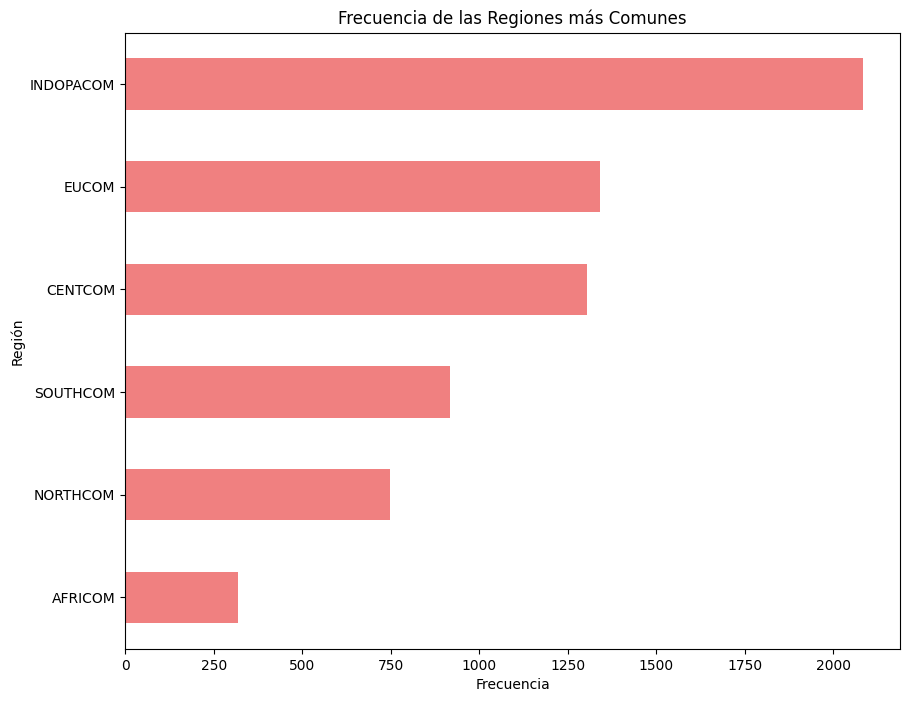

In [ ]:
def plot_region_and_heatmap(df,country_coordinates):
  pais = df['Country'].value_counts()
  # Gráfico de barras horizontales de la frecuencia de las regiones más comunes
  region_freq = df['Region Name'].value_counts().head(20)
  plt.figure(figsize=(10, 8))
  region_freq.plot(kind='barh', color='lightcoral')
  plt.xlabel('Frecuencia')
  plt.ylabel('Región')
  plt.title('Frecuencia de las Regiones más Comunes')
  plt.gca().invert_yaxis()
  plt.show()

  # Crear el mapa base centrado en el mundo
  world_map = folium.Map(location=[20, 0], zoom_start=2)

  # Crear una lista para almacenar las coordenadas y las frecuencias (para el HeatMap)
  heat_data = []

  # Recorrer las filas de la frecuencia de países y agregar los puntos con la frecuencia (intensidad)
  for country, count in pais.items():
      if country in country_coordinates:
          # Agregar la coordenada y la frecuencia (count) como intensidad
          heat_data.append([country_coordinates[country][0], country_coordinates[country][1], count])

  # Crear el HeatMap y agregarlo al mapa
  HeatMap(heat_data).add_to(world_map)

  # Mostrar el mapa de calor
  return world_map

# Uso de la función con el dataset df_clean
plot_region_and_heatmap(df_clean,country_coordinates)

In [ ]:
duration_stats = df_clean['Duration'].describe()
duration_stats

,Duration
count,6712.000000
mean,4.264452
std,6.706278
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,60.000000


##Distribución de las ofertas de forma temporal

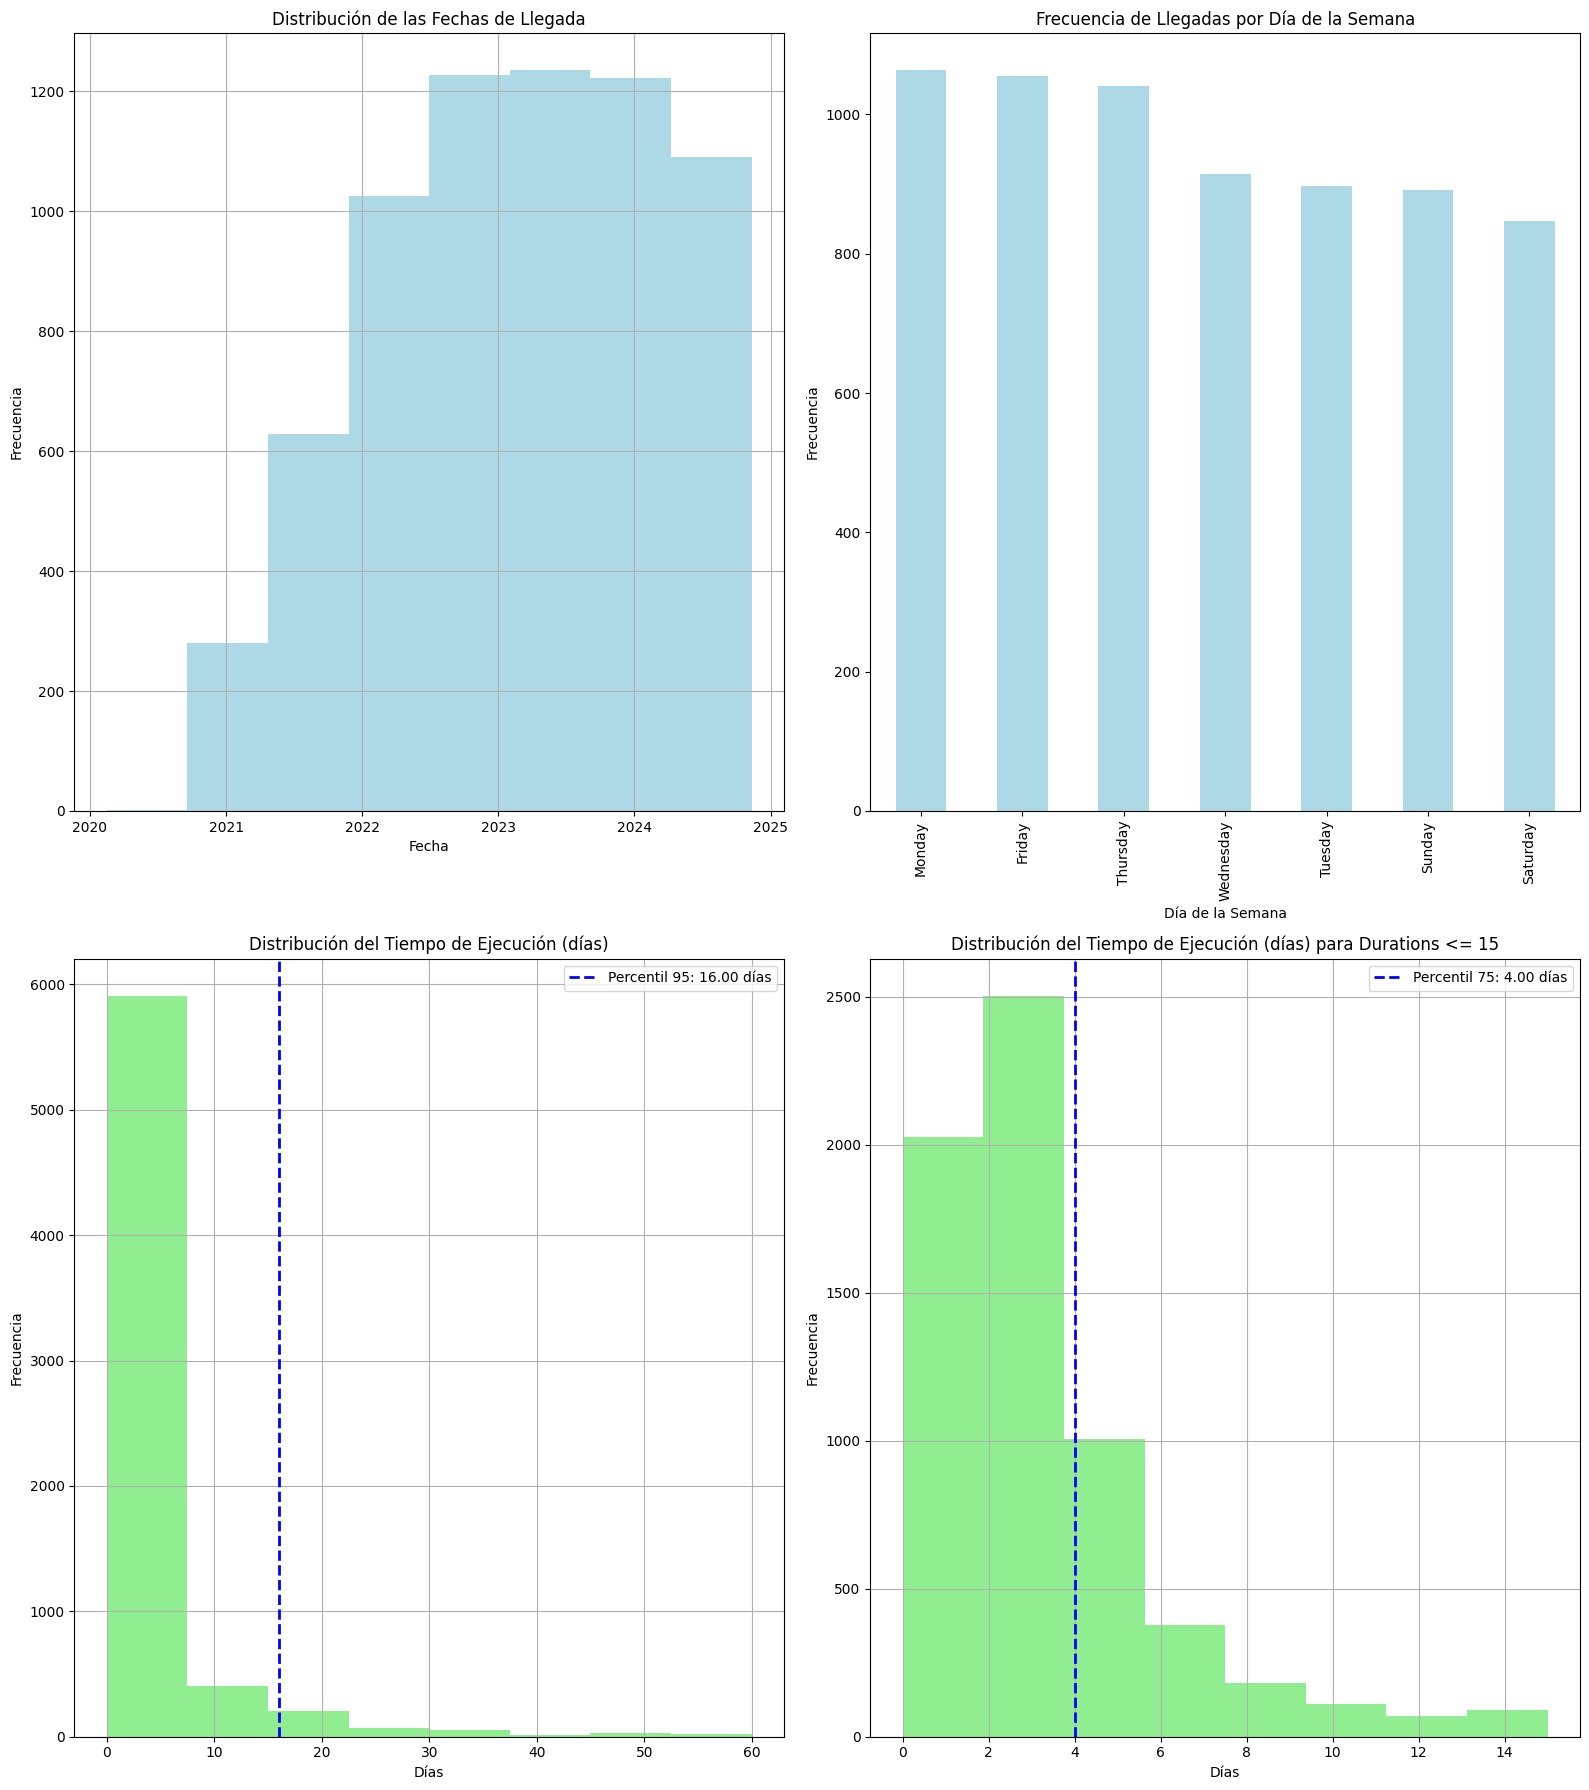

In [ ]:
def plot_time(df,bins=8):
    # Filtrar las duraciones negativas
    df_clean = df[df['Duration'] >= 0]

    # Crear la figura con n filas y 2 columnas
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 18))

    # Primer gráfico: Distribución de las Fechas de Llegada
    df_clean['Arrival'].dt.date.hist(bins=bins, color='lightblue', ax=axs[0, 0])
    axs[0, 0].set_title('Distribución de las Fechas de Llegada')
    axs[0, 0].set_xlabel('Fecha')
    axs[0, 0].set_ylabel('Frecuencia')

    # Segundo gráfico: Frecuencia de Llegadas por Día de la Semana
    df_clean['Arrival Day'] = df_clean['Arrival'].dt.day_name()
    arrival_day_freq = df_clean['Arrival Day'].value_counts()
    arrival_day_freq.plot(kind='bar', color='lightblue', ax=axs[0, 1])
    axs[0, 1].set_title('Frecuencia de Llegadas por Día de la Semana')
    axs[0, 1].set_xlabel('Día de la Semana')
    axs[0, 1].set_ylabel('Frecuencia')

    # Tercer gráfico: Distribución del Tiempo de Ejecución (días)
    upper_bound = df_clean['Duration'].quantile(0.95)
    df_clean['Duration'].hist(bins=bins, color='lightgreen', ax=axs[1, 0])
    axs[1, 0].axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label=f'Percentil 95: {upper_bound:.2f} días')
    axs[1, 0].set_title('Distribución del Tiempo de Ejecución (días)')
    axs[1, 0].set_xlabel('Días')
    axs[1, 0].set_ylabel('Frecuencia')
    axs[1, 0].legend()

    # Cuartil 75% para Durations <= 15
    upper_bound_15 = df_clean[df_clean['Duration'] <= upper_bound]['Duration'].quantile(0.75)
    df_clean[df_clean['Duration'] <= 15]['Duration'].hist(bins=bins, color='lightgreen', ax=axs[1, 1])
    axs[1, 1].axvline(upper_bound_15, color='blue', linestyle='dashed', linewidth=2, label=f'Percentil 75: {upper_bound_15:.2f} días')
    axs[1, 1].set_title('Distribución del Tiempo de Ejecución (días) para Durations <= 15')
    axs[1, 1].set_xlabel('Días')
    axs[1, 1].set_ylabel('Frecuencia')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Uso de la función con el dataset df_clean
plot_time(df_clean)

##Distribucion de tiempo promedio inter-arrivo de los barcos

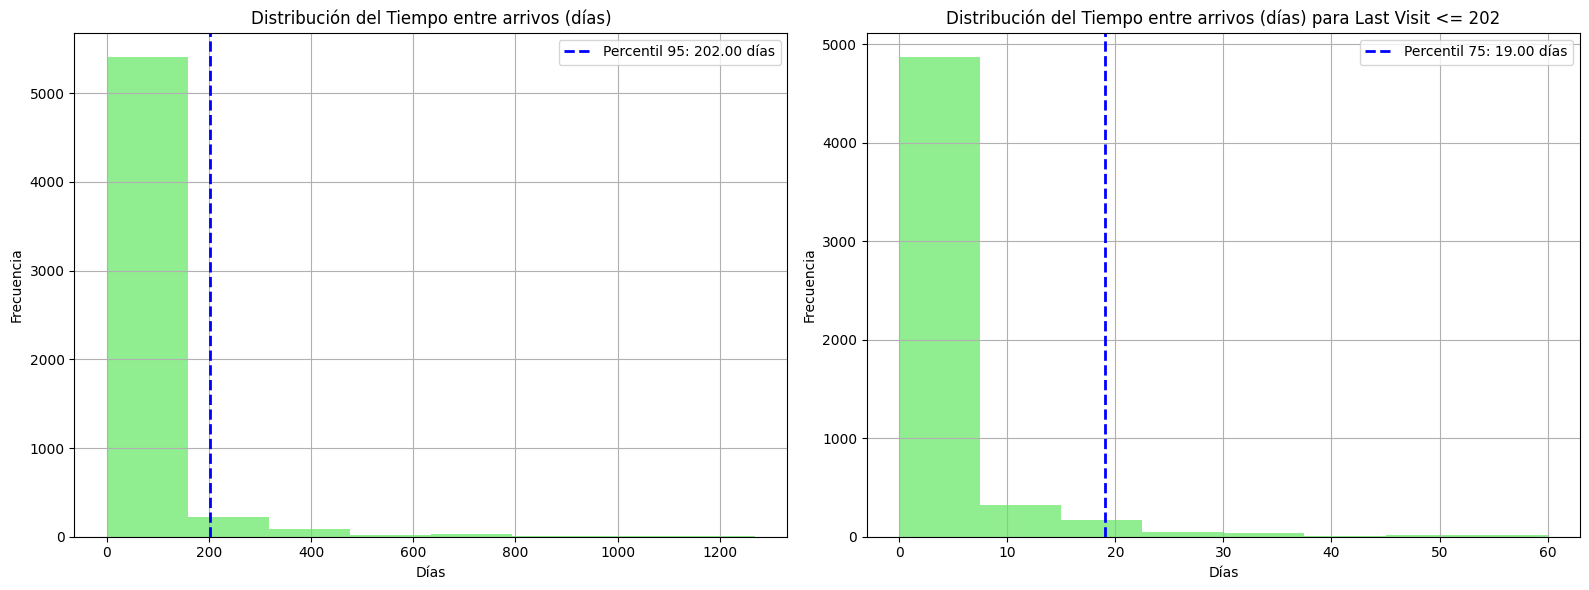

,Ship Name,Vessel Type,Country,Location,Arrival,Departure,Region Name,Status,Duration,Last Visit
8272,Abraham Lincoln,CVN,Japan,Okinawa,2022-02-16,2022-02-23,INDOPACOM,Not Submitted,7,NaN
5809,Abraham Lincoln,CVN,Japan,Yokosuka,2022-02-24,2022-02-28,INDOPACOM,Not Submitted,4,1.0
8276,Abraham Lincoln,CVN,Japan,Okinawa,2022-02-24,2022-02-28,INDOPACOM,Not Submitted,4,-4.0
5780,Abraham Lincoln,CVN,Philippines,Manila,2022-03-25,2022-03-29,INDOPACOM,Not Submitted,4,25.0
5755,Abraham Lincoln,CVN,Vietnam,Da Nang,2022-05-08,2022-05-12,INDOPACOM,Not Submitted,4,40.0
...,...,...,...,...,...,...,...,...,...,...
3888,Zumwalt,DDG,USA,Seward,2023-05-12,2023-05-14,NORTHCOM,Lost,2,NaN
3850,Zumwalt,DDG,USA,Seward,2023-05-20,2023-05-21,NORTHCOM,Lost,1,6.0
3374,Zumwalt,DDG,Mexico,Manzanillo,2023-07-26,2023-07-29,NORTHCOM,Lost,3,66.0
3392,Zumwalt,DDG,Panama,Rodman,2023-08-05,2023-08-07,SOUTHCOM,Lost,2,7.0


In [ ]:
def generate_interarrival_plots(df,bins=8):

    df = df.sort_values(by=['Ship Name', 'Arrival'])
    # Calcular 'Last Visit' como el tiempo entre 'Arrival' actual y el 'Departure' anterior para cada barco
    df['Last Visit'] = df.groupby('Ship Name')['Departure'].shift()
    df['Last Visit'] = (df['Arrival'] - df['Last Visit']).dt.days

    # Cuartil 95%
    upper_bound = df[df['Last Visit'] >= 0]['Last Visit'].quantile(0.95)

    # Crear la figura con una fila y dos columnas
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Primer gráfico: Distribución del Tiempo entre arrivos (días)
    df[df['Last Visit'] >= 0]['Last Visit'].hist(bins=bins, color='lightgreen', ax=axs[0])
    axs[0].axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label=f'Percentil 95: {upper_bound:.2f} días')
    axs[0].set_title('Distribución del Tiempo entre arrivos (días)')
    axs[0].set_xlabel('Días')
    axs[0].set_ylabel('Frecuencia')
    axs[0].legend()

    # Cuartil 75% para Last Visit <= 202
    upper_bound_15 = df[df['Last Visit'] <= upper_bound]['Last Visit'].quantile(0.75)

    # Segundo gráfico: Distribución del Tiempo entre arrivos (días) para Last Visit <= 202
    df[(df['Last Visit'] <= upper_bound) & (df['Last Visit'] >= 0)]['Duration'].hist(bins=bins, color='lightgreen', ax=axs[1])
    axs[1].axvline(upper_bound_15, color='blue', linestyle='dashed', linewidth=2, label=f'Percentil 75: {upper_bound_15:.2f} días')
    axs[1].set_title('Distribución del Tiempo entre arrivos (días) para Last Visit <= 202')
    axs[1].set_xlabel('Días')
    axs[1].set_ylabel('Frecuencia')
    axs[1].legend()

    # Mostrar la figura
    plt.tight_layout()
    plt.show()

    return df

generate_interarrival_plots(df_clean)


#Analisis granular, Trayectoria de barco Trenton
Modelo descriptivo y predictivo del barco con mas información en el Dataset, para medir el

In [ ]:
#Seleccionar solo datos con el barco seleccionado
Ship_Name='Trenton'
df_Trenton=df_clean[df_clean['Ship Name']==Ship_Name]
df_Trenton

,Ship Name,Vessel Type,Country,Location,Arrival,Departure,Region Name,Status,Duration
290,Trenton,T-EPF,Italy,Taranto,2024-09-23,2024-09-26,EUCOM,Lost,3
376,Trenton,T-EPF,Croatia,Rijeka,2024-08-26,2024-09-19,EUCOM,Lost,24
563,Trenton,T-EPF,Croatia,Rijeka,2024-07-19,2024-08-10,EUCOM,Lost,22
1520,Trenton,T-EPF,Greece,Souda Bay,2024-03-26,2024-03-29,EUCOM,Not Submitted,3
1611,Trenton,T-EPF,Italy,Taranto,2024-03-02,2024-03-12,EUCOM,Lost,10
...,...,...,...,...,...,...,...,...,...
8498,Trenton,T-EPF,Greece,Souda Bay,2022-03-07,2022-03-07,EUCOM,Not Submitted,0
8521,Trenton,T-EPF,Greece,Souda Bay,2021-06-21,2021-06-24,EUCOM,Not Submitted,3
8528,Trenton,T-EPF,Greece,Souda Bay,2021-05-14,2021-05-16,EUCOM,Not Submitted,2
8658,Trenton,T-EPF,Spain,Cadiz,2021-06-02,2021-06-11,EUCOM,Not Submitted,9


##Distribución de las ofertas del barco Trenton de forma Espacial

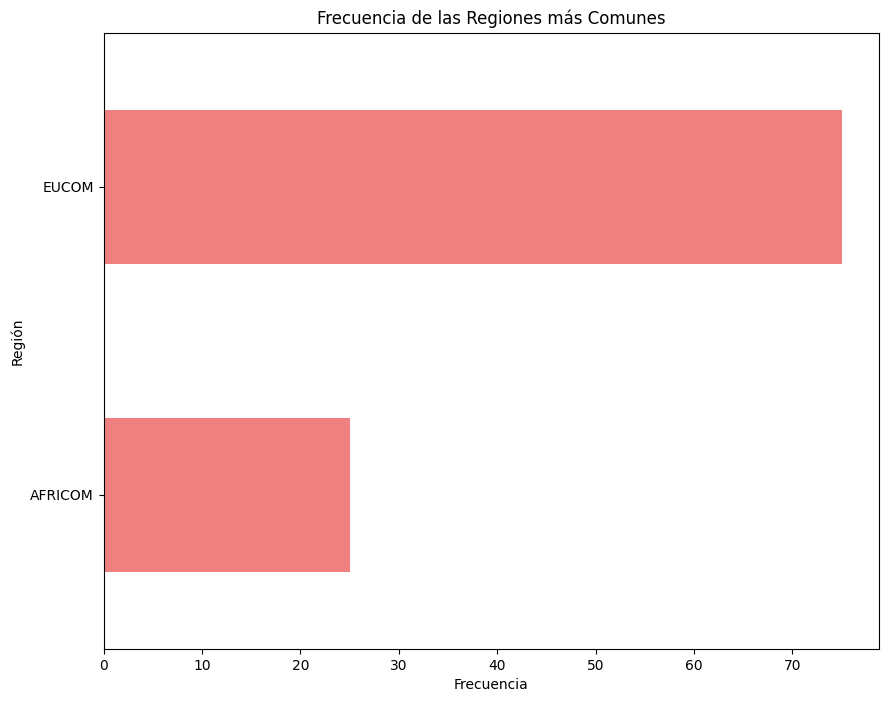

In [ ]:
plot_region_and_heatmap(df_Trenton,country_coordinates)

##Distribución de las ofertas del barco Trenton de forma Temporal

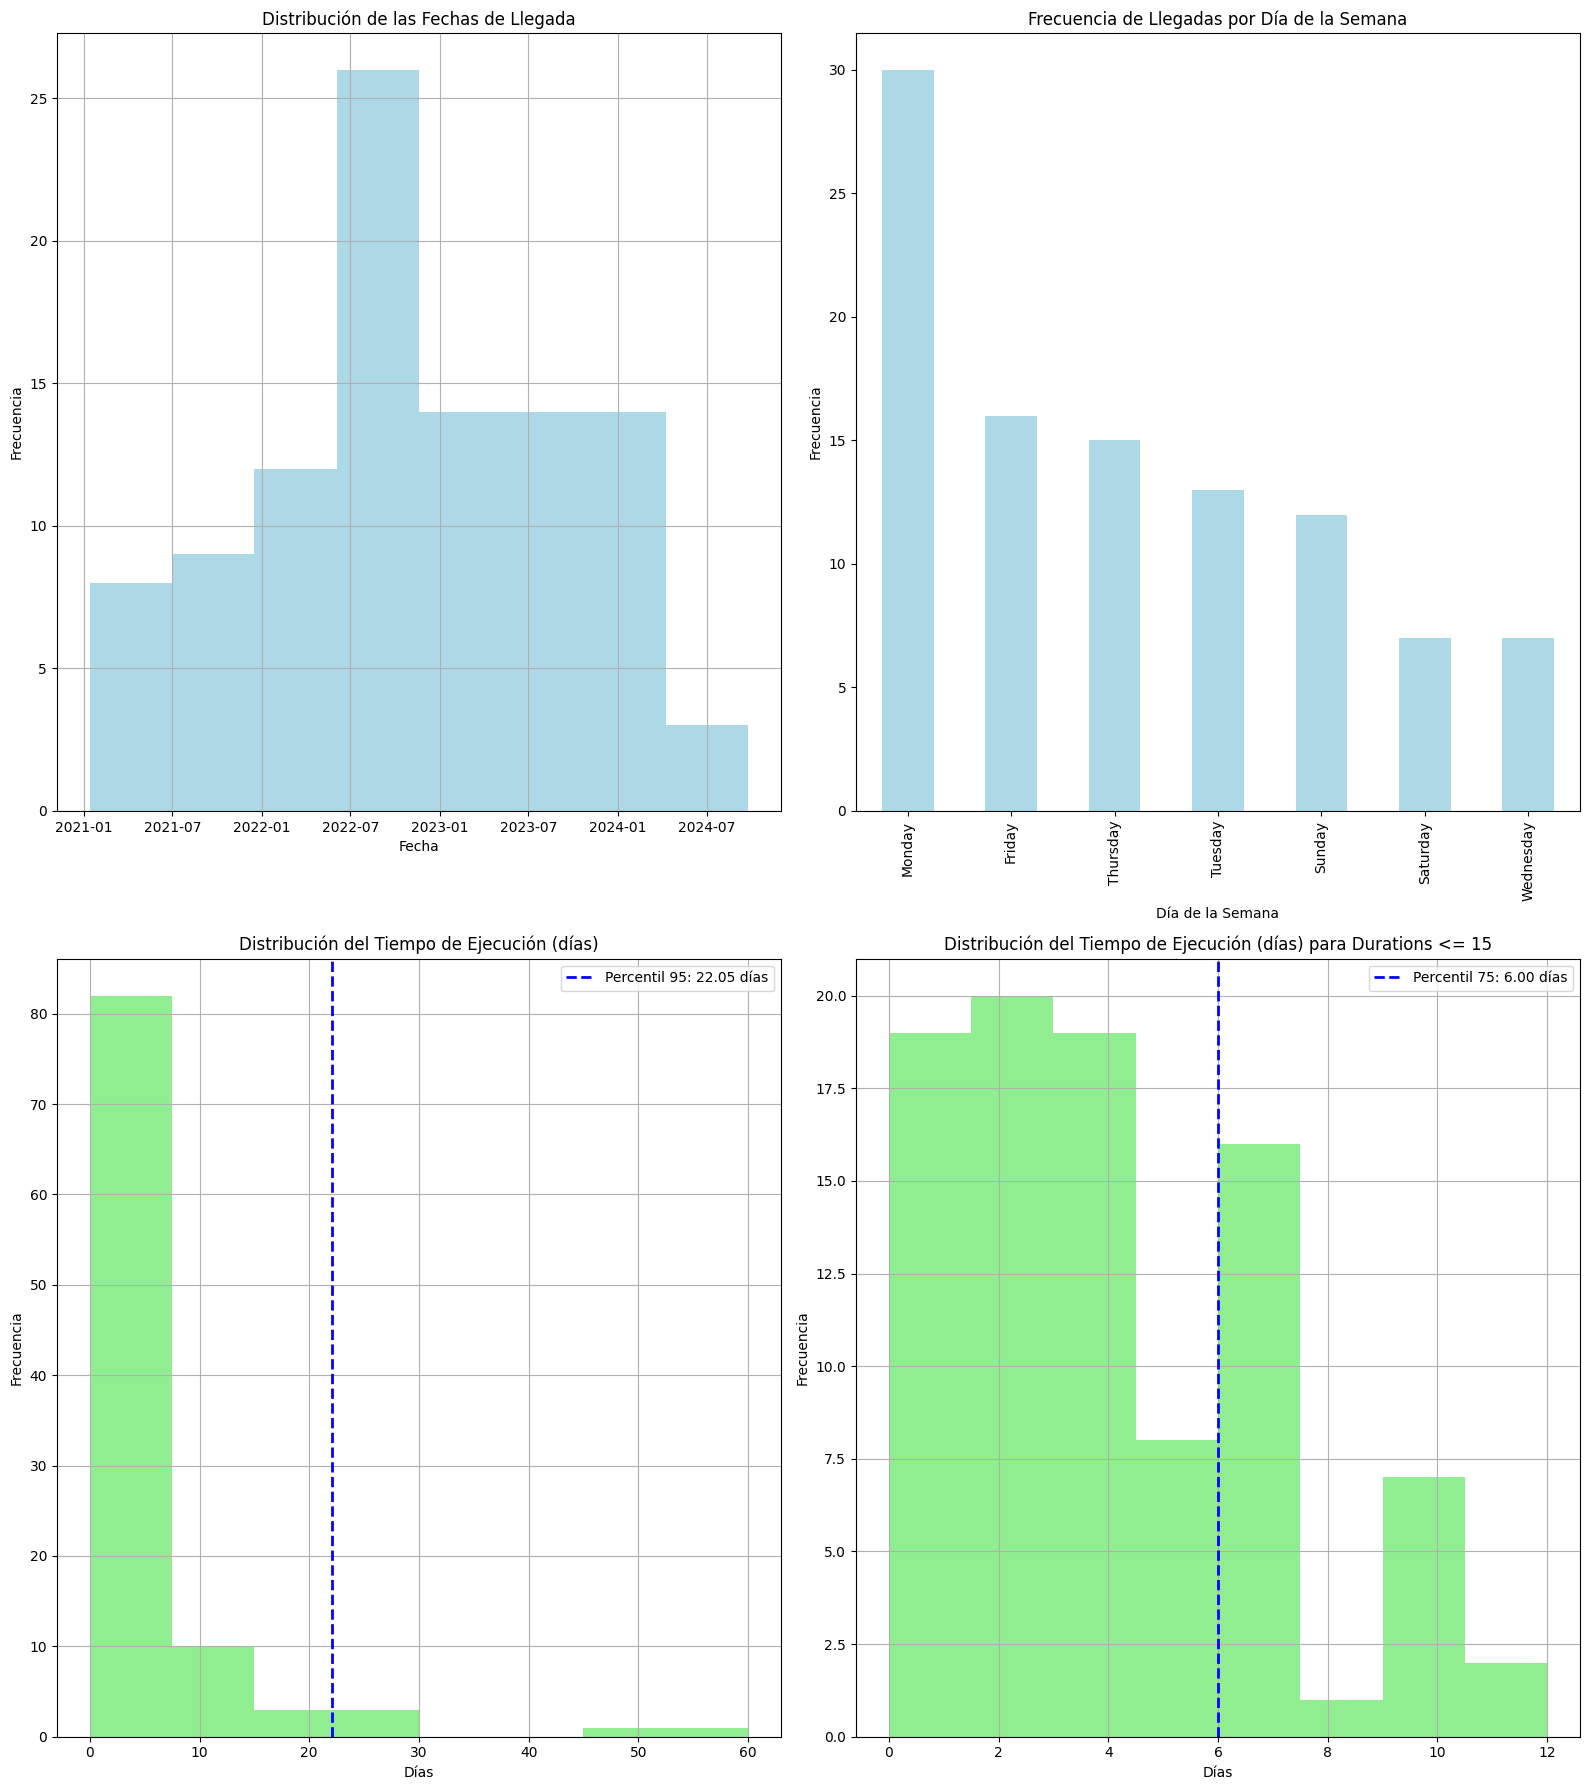

In [ ]:
plot_time(df_Trenton)

##Distribucion de tiempo promedio inter-arrivo del barco trenton

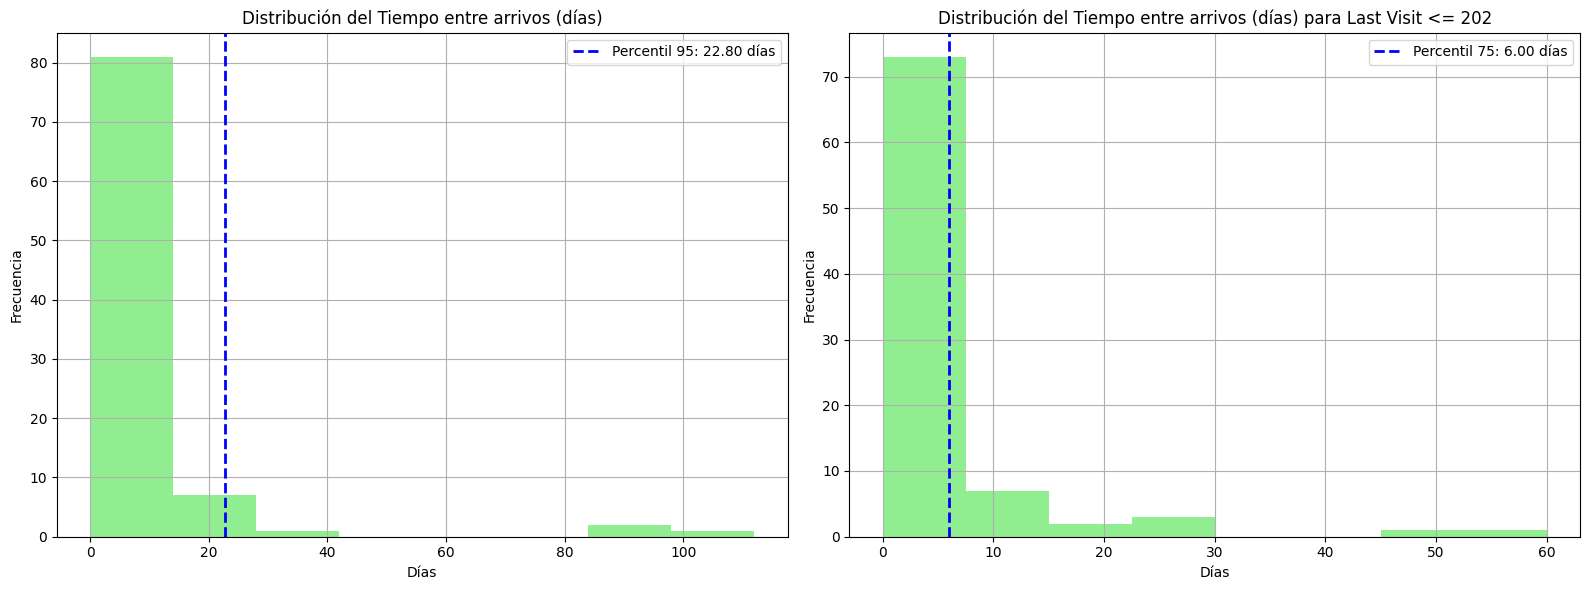

,Ship Name,Vessel Type,Country,Location,Arrival,Departure,Region Name,Status,Duration,Last Visit
7453,Trenton,T-EPF,Italy,Civitavecchia,2021-01-13,2021-01-15,EUCOM,Not Submitted,2,NaN
7560,Trenton,T-EPF,Greece,Souda Bay,2021-01-25,2021-01-29,EUCOM,Not Submitted,4,10.0
7582,Trenton,T-EPF,Algeria,Algiers,2021-02-01,2021-02-03,AFRICOM,Not Submitted,2,3.0
7491,Trenton,T-EPF,Sudan,Port of Sudan,2021-02-08,2021-02-10,AFRICOM,Lost,2,5.0
7501,Trenton,T-EPF,Greece,Souda Bay,2021-02-13,2021-02-14,EUCOM,Not Submitted,1,3.0
...,...,...,...,...,...,...,...,...,...,...
1658,Trenton,T-EPF,Algeria,Algiers,2024-03-22,2024-03-23,AFRICOM,Not Submitted,1,2.0
1520,Trenton,T-EPF,Greece,Souda Bay,2024-03-26,2024-03-29,EUCOM,Not Submitted,3,3.0
563,Trenton,T-EPF,Croatia,Rijeka,2024-07-19,2024-08-10,EUCOM,Lost,22,112.0
376,Trenton,T-EPF,Croatia,Rijeka,2024-08-26,2024-09-19,EUCOM,Lost,24,16.0


In [ ]:
generate_interarrival_plots(df_Trenton)

#Modelo Predictivo solo Location

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


def predict_next_location(df_c):
  df = df_c.copy()

  # Convertir columnas de fecha a formato datetime
  df['Arrival'] = pd.to_datetime(df['Arrival'])
  df['Departure'] = pd.to_datetime(df['Departure'])

  # Convertir columnas de fecha a ordinal para el modelo
  df['Arrival_ordinal'] = df['Arrival'].map(pd.Timestamp.toordinal)
  df['Departure_ordinal'] = df['Departure'].map(pd.Timestamp.toordinal)

  # Codificar características categóricas
  label_encoders = {}
  for col in ['Ship Name','Vessel Type', 'Country', 'Location','Status','Arrival_ordinal','Departure_ordinal']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

  # Definir características (X) y variables objetivo (y)
  X = df[['Ship Name','Arrival_ordinal','Departure_ordinal']]
  y_location = df['Location']

  # Dividir los datos en conjunto de entrenamiento y prueba
  X_train, X_test, y_train_location, y_test_location = train_test_split(X, y_location, test_size=0.2, random_state=42)

  # Crear y entrenar los modelos de regresión lineal múltiple
  model_location = LinearRegression()
  model_location.fit(X_train, y_train_location)

  # Predecir la próxima ubicación y fecha de llegada del barco
  next_data = X_test.iloc[-1].values.reshape(1, -1)
  predicted_location = model_location.predict(next_data)

  # Decodificar Location
  predicted_location = label_encoders['Location'].inverse_transform(predicted_location.astype(int))
  location_accuracy = model_location.score(X_test, y_test_location)
  location_mse = mean_squared_error(y_test_location, model_location.predict(X_test))
  location_r2 = r2_score(y_test_location, model_location.predict(X_test))
  print(f"Precisión de Ubicación: {location_accuracy * 100:.2f}%")
  print(f"Error Cuadrático Medio de Ubicación: {location_mse:.2f}")
  print(f"R^2 de Ubicación: {location_r2:.2f}")

  return predicted_location[0]

predicted_location = predict_next_location(df_Trenton)
print(f"Próxima ubicación del barco: {predicted_location}")

Precisión de Ubicación: -15.76%
Error Cuadrático Medio de Ubicación: 183.30
R^2 de Ubicación: -0.16
Próxima ubicación del barco: La Goulette


#Modelo predictivo Todo

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


def predict_next_location_and_arrival(df_c):
  df = df_c.copy()

  # Convertir columnas de fecha a formato datetime
  df['Arrival'] = pd.to_datetime(df['Arrival'])
  df['Departure'] = pd.to_datetime(df['Departure'])

  # Convertir columnas de fecha a ordinal para el modelo
  df['Arrival_ordinal'] = df['Arrival'].map(pd.Timestamp.toordinal)
  df['Departure_ordinal'] = df['Departure'].map(pd.Timestamp.toordinal)

  # Codificar características categóricas
  label_encoders = {}
  for col in ['Ship Name', 'Vessel Type', 'Country', 'Location', 'Region Name', 'Status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

  # Definir características (X) y variables objetivo (y)
  X = df[['Vessel Type', 'Country', 'Departure_ordinal', 'Region Name', 'Status', 'Duration']]
  y_location = df['Location']
  y_arrival = df['Arrival_ordinal']

  # Dividir los datos en conjunto de entrenamiento y prueba
  X_train, X_test, y_train_location, y_test_location = train_test_split(X, y_location, test_size=0.2, random_state=42)
  _, _, y_train_arrival, y_test_arrival = train_test_split(X, y_arrival, test_size=0.2, random_state=42)

  # Crear y entrenar los modelos de regresión lineal múltiple
  model_location = LinearRegression()
  model_location.fit(X_train, y_train_location)

  model_arrival = LinearRegression()
  model_arrival.fit(X_train, y_train_arrival)

  # Predecir la próxima ubicación y fecha de llegada del barco
  next_data = X_test.iloc[-1].values.reshape(1, -1)
  predicted_location = model_location.predict(next_data)
  predicted_arrival = model_arrival.predict(next_data)

  # Decodificar Location
  predicted_location = label_encoders['Location'].inverse_transform(predicted_location.astype(int))
  location_accuracy = model_location.score(X_test, y_test_location)
  location_mse = mean_squared_error(y_test_location, model_location.predict(X_test))
  location_r2 = r2_score(y_test_location, model_location.predict(X_test))
  print(f"Precisión de Ubicación: {location_accuracy * 100:.2f}%")
  print(f"Error Cuadrático Medio de Ubicación: {location_mse:.2f}")
  print(f"R^2 de Ubicación: {location_r2:.2f}")

  return predicted_location[0]

predicted_location = predict_next_location_and_arrival(df_Trenton)
print(f"Próxima ubicación del barco: {predicted_location}")

Precisión de Ubicación: -15.35%
Error Cuadrático Medio de Ubicación: 182.66
R^2 de Ubicación: -0.15
Próxima ubicación del barco: Limassol
